## Sub Quest Pill16: Derive, implement, analyze Kernel PCA ##

We implement the Kernel PCA using the Gaussian Kernel. It will be shown that just keeping one eigenvector with the largest eigenvalue we can use a linear classifier to separate both classes. It will be done projecting the test points troughout this eigenvector and this transformation will allow a linear classifier to separate both classes.

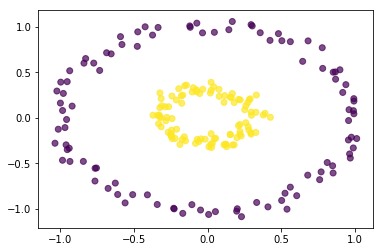

In [299]:
#example
import numpy as np

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, factor=.3, noise=.05)

y = 2*y-1

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)

We are going to implement the Gaussian, Linear and Polynomial Kernel and see which ones works better in this scenario:

$$
\begin{align*}
{\bf linear}: &K(x_i,x_j)=x_i^Tx_j\\
{\bf polynomial:}&K(x_i,x_j)=(x_i^Tx_j+1)^d\\
{\bf gaussian:}&K(x_i,x_j)=exp\big( -\frac{\|x_i-x_j\|^2}{\sigma^2} \big)
\end{align*}$$

In [300]:
from scipy.spatial import distance

def linear_kernel(xa,xb):
    return np.dot(xa,xb.T)

def polinomial_kernel(xa,xb,d):
    return (np.dot(xa,xb.T) + 1)**d

def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)

We will start with the Gaussian:

In [301]:
gamma = 0.001
K = gaussian_kernel(X,X,gamma)

N = X.shape[0]
K_tilde = K - np.dot(np.sum(K,axis=1),np.ones((N,1)))/N - np.dot(np.ones((1,N)),np.sum(K,axis=0))/N + np.sum(K)*np.ones((N,N))/(N*N) 

vaps,veps=np.linalg.eig(K_tilde)
K_tilde.shape

(200, 200)

## 1-Dimensional separation ##

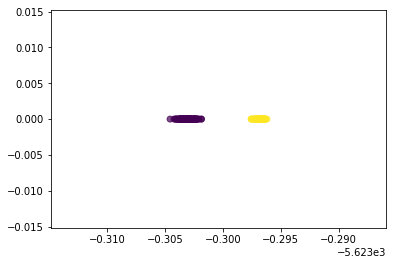

In [302]:
idx = np.argpartition(abs(vaps), -1)[-1:]
veps1D = veps[:,idx]
z = np.dot(K_tilde, veps1D)
plt.scatter(z, np.zeros(z.shape[0]), c=y,  alpha=0.7)

## 2-Dimensional separation ##

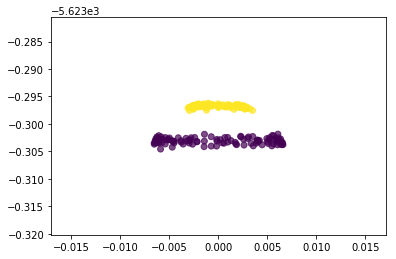

In [303]:
idx = np.argpartition(abs(vaps), -2)[-2:]
veps2D = veps[:,idx]
z = np.dot(K_tilde, veps2D)
plt.scatter(z[:,0], z[:,1], c=y,  alpha=0.7)

## 3-Dimensional separation ##

array([2, 1, 0], dtype=int64)

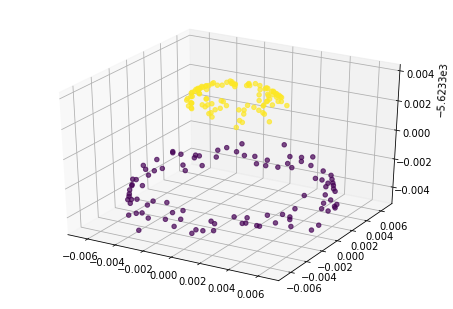

In [304]:
idx = np.argpartition(abs(vaps), -3)[-3:]
veps3D = veps[:,idx]
z = np.dot(K_tilde, veps3D)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(z[:,0], z[:,1], z[:,2], c=y,  alpha=0.7)
idx

## X_test Prediction: ##

(40000, 2)


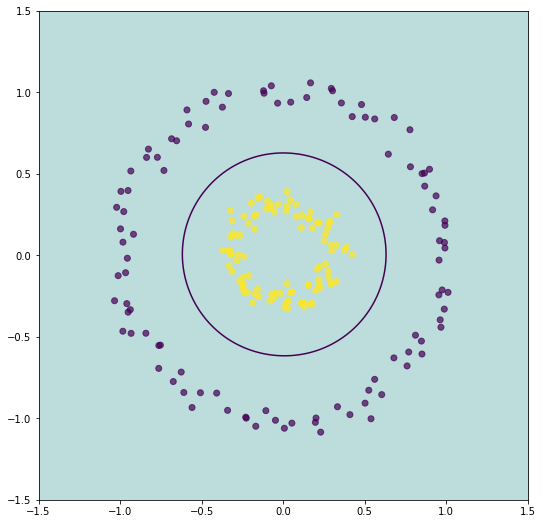

In [305]:
xx,yy = np.meshgrid(np.linspace(-1.5,1.5,200),np.linspace(-1.5,1.5,200))
viz=np.c_[xx.ravel(),yy.ravel()]
print(viz.shape)

K_t= gaussian_kernel(viz,X,gamma) 

N = X.shape[0]
N_test = viz.shape[0]

K_test = K_t - np.dot(np.sum(K_t,axis=1)[:,np.newaxis],np.ones((1,N)))/N - np.dot(np.ones((N_test,1)),np.sum(K,axis=0)[np.newaxis,:])/N + np.sum(K)*np.ones((N_test,N))/(N*N) 

z = np.dot(K_test,veps1D)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=-10, vmax=10)
plt.contour(xx,yy,z.reshape((200,200)), [0])

plt.gcf().set_size_inches((9,9))

Linear Kernel implementation:

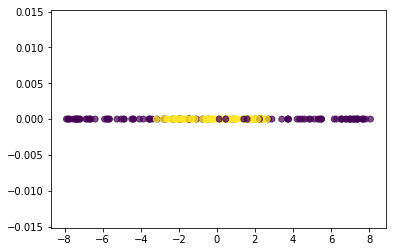

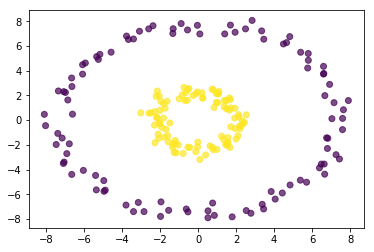

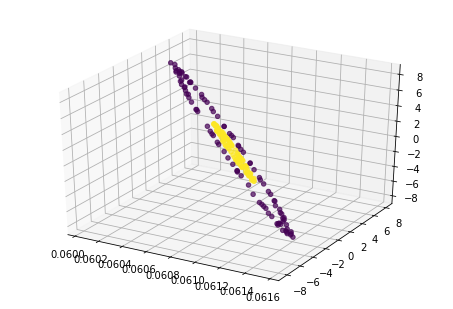

In [306]:
K = linear_kernel(X,X)

N = X.shape[0]
K_tilde = K - np.dot(np.sum(K,axis=1),np.ones((N,1)))/N - np.dot(np.ones((1,N)),np.sum(K,axis=0))/N + np.sum(K)*np.ones((N,N))/(N*N) 

vaps,veps=np.linalg.eig(K_tilde)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

idx = np.argpartition(abs(vaps), -1)[-1:]
if np.sum(veps[:,idx[0]].imag)==0:
    veps1D = veps[:,idx]
    z = np.dot(K_tilde, veps1D.real)
    plt.scatter(z, np.zeros(z.shape[0]), c=y,  alpha=0.7)
    plt.show()
else:
    pass

idx = np.argpartition(abs(vaps), -2)[-2:]
if np.sum(veps[:,idx[0]].imag)==0:
    veps2D = veps[:,idx]
    z = np.dot(K_tilde, veps2D.real)
    plt.scatter(z[:,0], z[:,1], c=y,  alpha=0.7)
    plt.show()
else:
    pass

idx = np.argpartition(abs(vaps), -3)[-3:]
if np.sum(veps[:,idx[0]].imag)==0:
    veps3D = veps[:,idx]
    z = np.dot(K_tilde, veps3D.real)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(z[:,0], z[:,1], z[:,2], c=y,  alpha=0.7)
    plt.show()
else:
    pass

## X_test Linear Prediction: ##

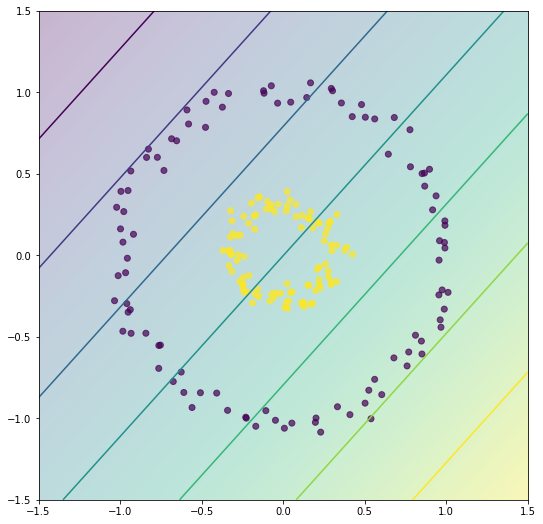

In [307]:
xx,yy = np.meshgrid(np.linspace(-1.5,1.5,200),np.linspace(-1.5,1.5,200))
viz=np.c_[xx.ravel(),yy.ravel()]

K_t= linear_kernel(viz,X)

N = X.shape[0]
N_test = viz.shape[0]

K_test = K_t - np.dot(np.sum(K_t,axis=1)[:,np.newaxis],np.ones((1,N)))/N - np.dot(np.ones((N_test,1)),np.sum(K,axis=0)[np.newaxis,:])/N + np.sum(K)*np.ones((N_test,N))/(N*N) 

z = np.dot(K_test,veps1D.real)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=-10, vmax=10)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

Polynomial Kernel implementation:

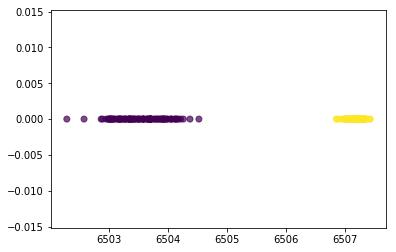

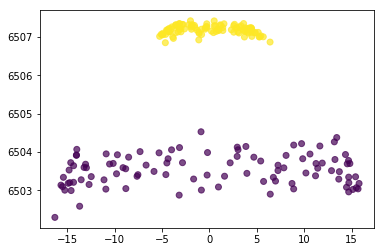

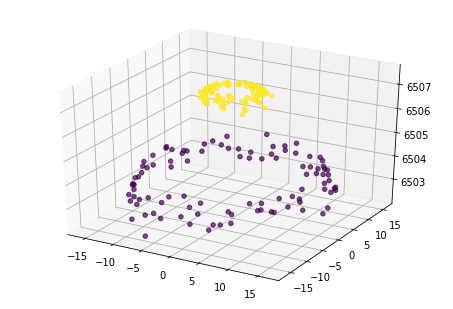

In [308]:
d = 2
K = polinomial_kernel(X,X,d)

N = X.shape[0]
K_tilde = K - np.dot(np.sum(K,axis=1),np.ones((N,1)))/N - np.dot(np.ones((1,N)),np.sum(K,axis=0))/N + np.sum(K)*np.ones((N,N))/(N*N) 

vaps,veps=np.linalg.eig(K_tilde)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

idx = np.argpartition(abs(vaps), -1)[-1:]
if np.sum(veps[:,idx[0]].imag)==0:
    veps1D = veps[:,idx]
    z = np.dot(K_tilde, veps1D.real)
    plt.scatter(z, np.zeros(z.shape[0]), c=y,  alpha=0.7)
    plt.show()
else:
    pass

idx = np.argpartition(abs(vaps), -2)[-2:]
if np.sum(veps[:,idx[0]].imag)==0:
    veps2D = veps[:,idx]
    z = np.dot(K_tilde, veps2D.real)
    plt.scatter(z[:,0], z[:,1], c=y,  alpha=0.7)
    plt.show()
else:
    pass

idx = np.argpartition(abs(vaps), -3)[-3:]
if np.sum(veps[:,idx[0]].imag)==0:
    veps3D = veps[:,idx]
    z = np.dot(K_tilde, veps3D.real)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(z[:,0], z[:,1], z[:,2], c=y,  alpha=0.7)
    plt.show()
else:
    pass

## X_test Polynomial Prediction: ##

(40000, 2)


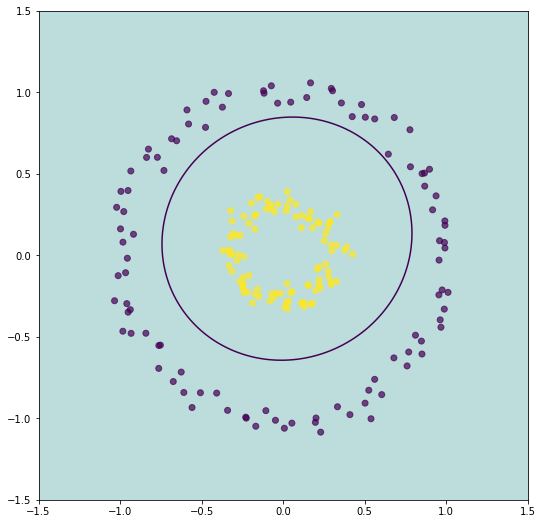

In [309]:
xx,yy = np.meshgrid(np.linspace(-1.5,1.5,200),np.linspace(-1.5,1.5,200))
viz=np.c_[xx.ravel(),yy.ravel()]
print(viz.shape)

K_t = polinomial_kernel(viz,X,d) 

N = X.shape[0]
N_test = viz.shape[0]

K_test = K_t - np.dot(np.sum(K_t,axis=1)[:,np.newaxis],np.ones((1,N)))/N - np.dot(np.ones((N_test,1)),np.sum(K,axis=0)[np.newaxis,:])/N + np.sum(K)*np.ones((N_test,N))/(N*N) 

z = np.dot(K_test,veps1D.real)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=-10, vmax=10)
plt.contour(xx,yy,z.reshape((200,200)), [0])

plt.gcf().set_size_inches((9,9))

As it can be seen, the Polynomial and Gaussian Kernels works good enough in this kind of problems. However, the linear Kernel does not provide a good prediction and the data is not lineraly separable at least in the 3 first projections throughout the eigenvectors whcih have the largest eigenvalues.